<a href="https://colab.research.google.com/github/yunakim999/Breast-Cancer-Diagnosis-Prediction-with-Decision-Tree-Classifier/blob/main/Breast_Cancer_Diagnosis_Prediction_with_Decision_Tree_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Breast-Cancer-Diagnosis-Prediction-with-Decision-Tree-Classifier


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor, plot_tree
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split

In [ ]:
cancer.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
cancer = cancer.loc[:, ~cancer.columns.str.contains('^Unnamed')]
cancer.columns = cancer.columns.str.replace(' ', '_')

In [ ]:
cancer.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
cancer.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
X_cancer = cancer.drop('diagnosis', axis=1)
y_cancer = cancer['diagnosis']

In [ ]:
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(X_cancer, y_cancer, test_size=0.3, random_state=42)

dt_classifier_cancer = DecisionTreeClassifier(random_state=42)
dt_classifier_cancer.fit(X_train_cancer, y_train_cancer)

y_pred_cancer = dt_classifier_cancer.predict(X_test_cancer)

accuracy_cancer = accuracy_score(y_test_cancer, y_pred_cancer)
accuracy_cancer

0.935672514619883

Accuracy shows 93.57% which indicates good performance of predicting the diagnosis on the breast cancer dataset.

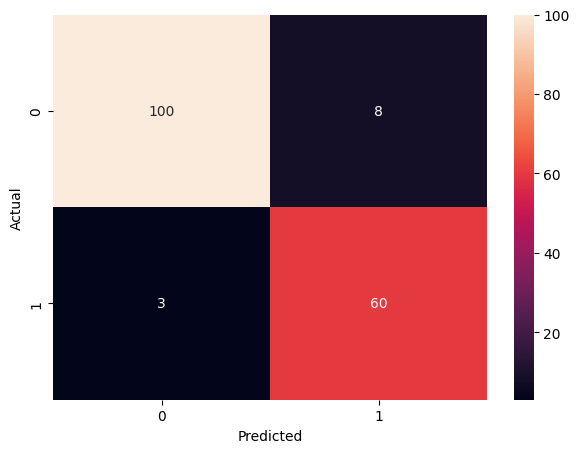

In [ ]:
conf_matrix = confusion_matrix(y_test_cancer, y_pred_cancer)
conf_matrix

plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


 True negative (top left) : Model identified true negative 100 times.
 False positive (top right) : Model incorrectly predicted negative cases of 8 as positive.
 False negative (bottom left) : Model incorrectly predicted positive cases of 3 as negative.
 True positive (bottom right) : Model identified true positive 60 times.

 The confusion matrix suggests that the model is performing well, with high accuracy, sensitivity, and specificity. The model showed low number of false negative which is particulary important in medical diagnosis.

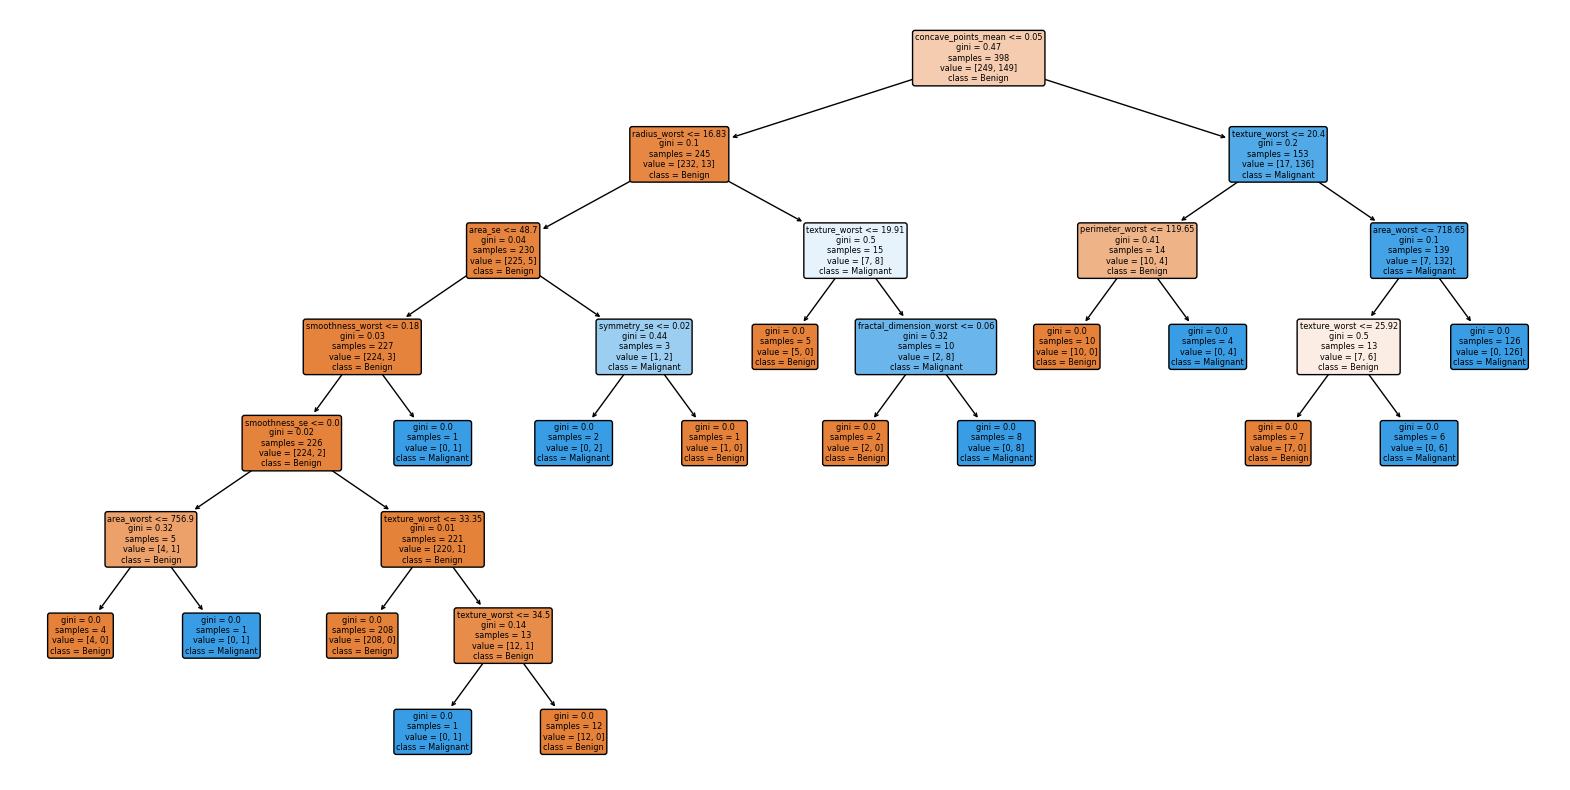

In [ ]:
plt.figure(figsize=(20, 10))

plot_tree(
    dt_classifier_cancer,
    filled=True,
    feature_names=X_cancer.columns,
    class_names=['Benign', 'Malignant'],
    rounded=True,
    proportion=False,
    precision=2
)

plt.show()

In [ ]:
used_features = []

importances = dt_classifier_cancer.feature_importances_

for feature, importance in zip(X_cancer.columns, importances):
    if importance > 0:
        used_features.append(feature)

print("Variables used in the tree are :", used_features)

Variables used in the tree are : ['concave_points_mean', 'area_se', 'smoothness_se', 'symmetry_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'fractal_dimension_worst']
